Import data

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import keras.utils as image
from keras.utils import Sequence
from keras.preprocessing.image import ImageDataGenerator

In [21]:
CSV_PATH = "../../data/ground_truth.csv"
IMAGE_FOLDER = "../data/"

In [22]:
# Učitavanje CSV-a
df = pd.read_csv(CSV_PATH)

In [23]:
# Pronaći redove sa nedostajućim vrednostima
missing_rows = df[df.isnull().any(axis=1)]

redovi koje treba da izbacimo

In [24]:
missing_rows

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
33,ISIC_0086462,IP_3200260,female,30.0,NaN,unknown,benign,0
38,ISIC_0088137,IP_5205991,NaN,NaN,lower extremity,unknown,benign,0
61,ISIC_0099474,IP_3057277,male,45.0,NaN,unknown,benign,0
188,ISIC_0174903,IP_2760044,male,40.0,NaN,unknown,benign,0
200,ISIC_0178744,IP_4248414,male,25.0,NaN,unknown,benign,0
...,...,...,...,...,...,...,...,...
32898,ISIC_9928421,IP_0961415,male,45.0,NaN,unknown,benign,0
33001,ISIC_9963692,IP_6017204,female,35.0,NaN,unknown,benign,0
33025,ISIC_9971473,IP_1005683,male,70.0,NaN,unknown,benign,0
33041,ISIC_9975949,IP_9245079,male,40.0,NaN,nevus,benign,0


In [25]:
# Dobiti listu slika koje treba obrisati
images_to_remove = missing_rows["image_name"].tolist()

In [26]:
#broj slika za izbacivanje
len(images_to_remove)

595

In [27]:
# Obrisati redove iz DataFrame-a
df_cleaned = df.dropna()

In [28]:
# Obrisati slike iz foldera
for image_name in images_to_remove:
    image_path = os.path.join(IMAGE_FOLDER, f"{image_name}.jpg")
    if os.path.exists(image_path):
        os.remove(image_path)

In [29]:
# Sačuvati novi CSV bez nedostajućih vrednosti
df_cleaned.to_csv("ground_truth_cleaned.csv", index=False)

In [30]:
print(f"Obrisano {len(missing_rows)} redova i {len(images_to_remove)} slika.")

Obrisano 595 redova i 595 slika.


In [31]:
#broj slika u folderu data nakon ciscenja :
if os.path.exists(IMAGE_FOLDER):
	print(len(os.listdir(IMAGE_FOLDER)))
else:
	print(f"Directory {IMAGE_FOLDER} does not exist.")

32531


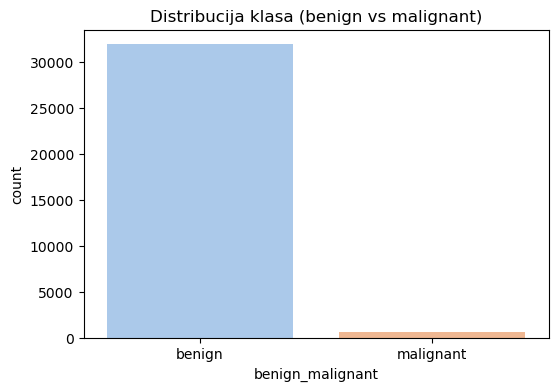

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x="benign_malignant", hue="benign_malignant", palette="pastel")
plt.title("Distribucija klasa (benign vs malignant)")
plt.show()

In [34]:
df_cleaned['benign_malignant'].value_counts()

benign_malignant
benign       31956
malignant      575
Name: count, dtype: int64